In [2]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [3]:
df = pd.read_csv("irmiger_006165257.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [47]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [48]:
#Missing data?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

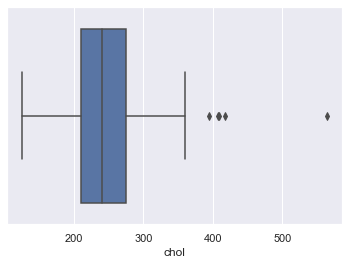

In [49]:
#I knew that there were outliers for cholesterol from midterm presentation
sns.boxplot(x=df['chol'])

In [50]:
#remove row with significant outlier, swap target values so 0 is no heart disease, 1 is heart disease
df = df[df.chol != 564]
df['target'] = df['target'].map({0: 1, 1: 0})
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,0
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,0
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,0
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,0
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,0


Next few inputs are getting general picture of my data

0    164
1    138
Name: target, dtype: int64


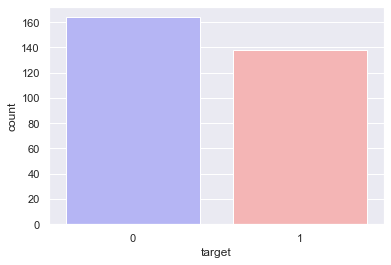

In [51]:
print(df.target.value_counts())
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

1    207
0     95
Name: sex, dtype: int64


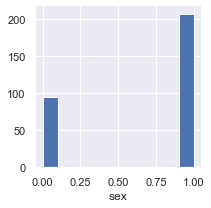

In [52]:
#1 = male, 0 = female
print(df.sex.value_counts())
gen = sns.FacetGrid(df)
gen.map(plt.hist,"sex")

count    302.000000
mean      54.324503
std        9.067887
min       29.000000
25%       47.250000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64


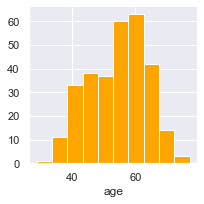

In [53]:
print(df.age.describe())
sns.set()
ages = sns.FacetGrid(df)
ages.map(plt.hist,"age", color="orange")

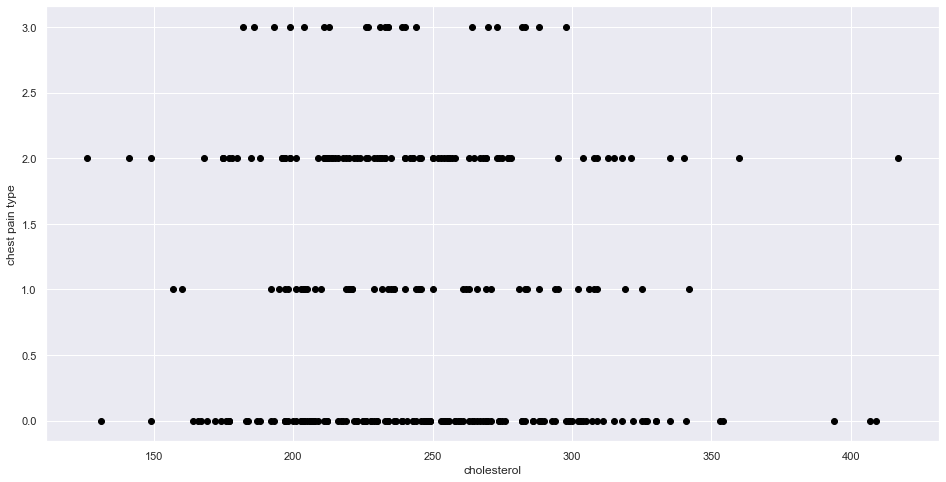

In [54]:
plt.figure(figsize=(16, 8))
plt.scatter(
    df['chol'],
    df['cp'],
    c='black'
)
plt.xlabel("cholesterol")
plt.ylabel("chest pain type")
plt.show()

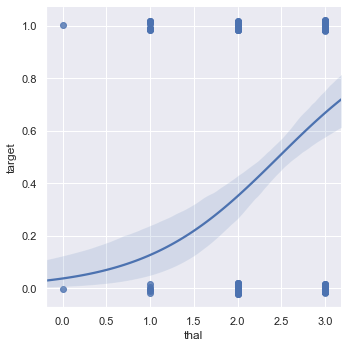

In [56]:
g = sns.lmplot(x="thal", y="target",  data=df, y_jitter=.02, logistic=True)
#g.set(xlim=(0, 80), ylim=(-.05, 1.05))

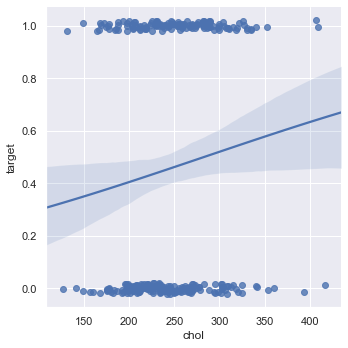

In [57]:
g = sns.lmplot(x="chol", y="target",  data=df, y_jitter=.02, logistic=True)

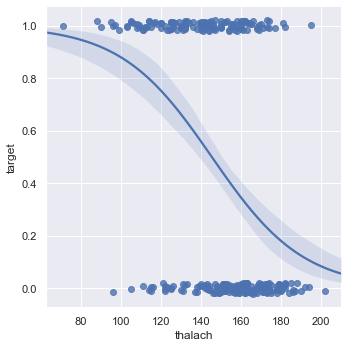

In [58]:
g = sns.lmplot(x="thalach", y="target",  data=df, y_jitter=.02, logistic=True)

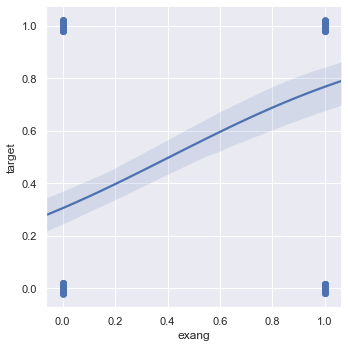

In [59]:
g = sns.lmplot(x="exang", y="target",  data=df, y_jitter=.02, logistic=True)

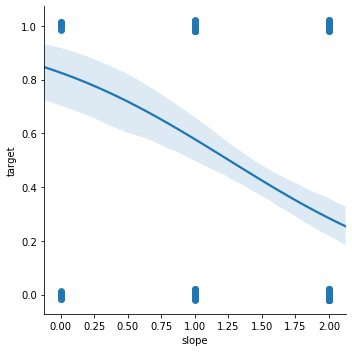

In [87]:
g = sns.lmplot(x="slope", y="target",  data=df, y_jitter=.02, logistic=True)

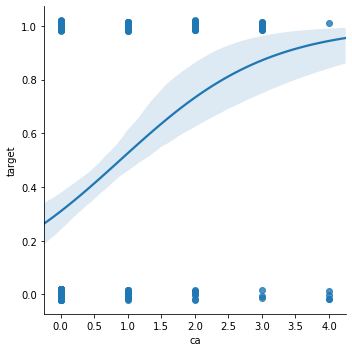

In [88]:
g = sns.lmplot(x="ca", y="target",  data=df, y_jitter=.02, logistic=True)

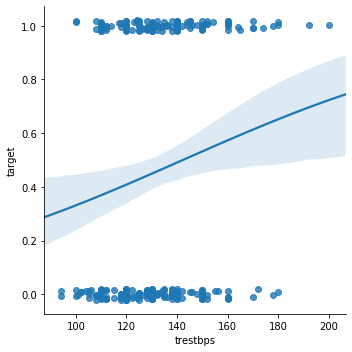

In [65]:
g = sns.lmplot(x="trestbps", y="target",  data=df, y_jitter=.02, logistic=True)

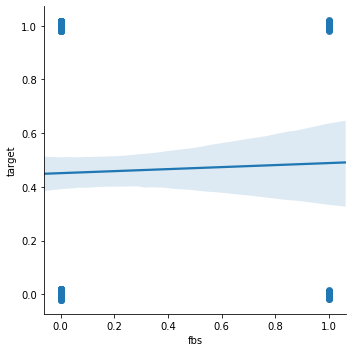

In [85]:
g = sns.lmplot(x="fbs", y="target",  data=df, y_jitter=.02, logistic=True)

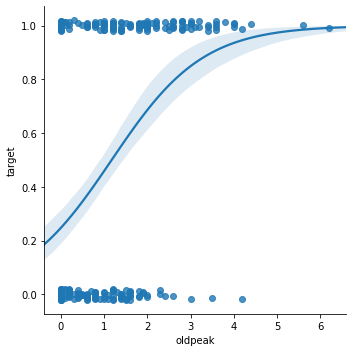

In [66]:
g = sns.lmplot(x="oldpeak", y="target",  data=df, y_jitter=.02, logistic=True)

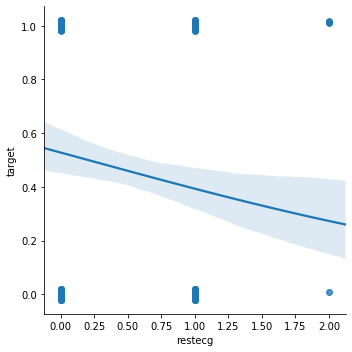

In [81]:
g = sns.lmplot(x="restecg", y="target",  data=df, y_jitter=.02, logistic=True)

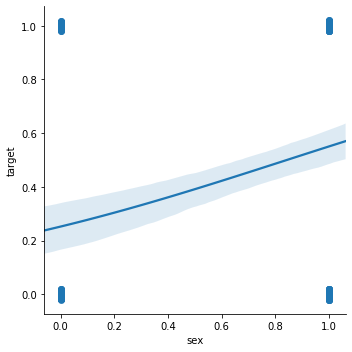

In [67]:
g = sns.lmplot(x="sex", y="target",  data=df, y_jitter=.02, logistic=True)

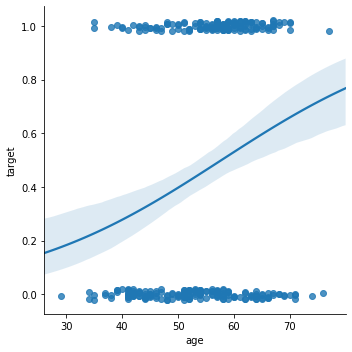

In [68]:
g = sns.lmplot(x="age", y="target",  data=df, y_jitter=.02, logistic=True)

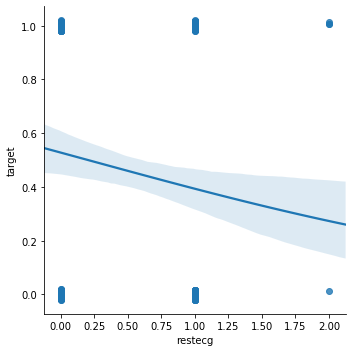

In [69]:
g = sns.lmplot(x="restecg", y="target",  data=df, y_jitter=.02, logistic=True)

In [60]:
cols_to_keep =['target', 'age','oldpeak','ca','thal','chol', 'thalach', 'trestbps']
data=df[cols_to_keep]
data.head(5)

,target,age,oldpeak,ca,thal,chol,thalach,trestbps
0,0,63,2.3,0,1,233,150,145
1,0,37,3.5,0,2,250,187,130
2,0,41,1.4,0,2,204,172,130
3,0,56,0.8,0,2,236,178,120
4,0,57,0.6,0,2,354,163,120


In [61]:
#set independent variables
xData = data[data.columns[1:]]
yData = data['target']
logit = sm.Logit(yData,xData)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.445934
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      295
Method:                           MLE   Df Model:                            6
Date:                Thu, 12 Dec 2019   Pseudo R-squ.:                  0.3532
Time:                        23:31:12   Log-Likelihood:                -134.67
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 3.212e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0164      0.016     -0.999      0.318      -0.049       0.016
oldpeak        0.6742      0.

In [62]:
#oods ratios
params = result.params
conf = result.conf_int()
conf['Odds Ratios'] = params
conf.columns = ['2.5%','97.5%','Odds Ratios']
print(np.exp(conf))

              2.5%     97.5%  Odds Ratios
age       0.952641  1.015873     0.983749
oldpeak   1.433580  2.686392     1.962437
ca        1.559020  2.984194     2.156946
thal      1.940516  5.179187     3.170220
chol      0.998258  1.011059     1.004638
thalach   0.950650  0.975131     0.962813
trestbps  0.994029  1.027458     1.010605
